In [14]:
import pandas as pd

df = pd.read_csv('NHANES_age_prediction.csv')
print(df.head())
print(df.info())
print(df.describe(include='all'))

      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6

Understanding the Dataset
The dataset you're working with is based on the NHANES (National Health and Nutrition Examination Survey), which assesses the health and nutritional status of adults and children in the United States. Here’s a summary:

Total Instances: 6,287  
Number of Features: 7  
Target Variable: age_group (categorical, indicating whether the respondent is "senior" or "non-senior")  
Feature Types: Real, Categorical, Integer  
  
Dataset Structure  
ID Variable: SEQN - Respondent Sequence Number  
Target Variable: age_group - Respondent's Age Group ("senior" or "non-senior")  
  
Other Variables: 
   
RIDAGEYR: Respondent's age in years (continuous)  
RIAGENDR: Respondent's gender (continuous, but likely categorical in nature)  
PAQ605: Engagement in moderate/vigorous activities (continuous, yes/no type)  
BMXBMI: Body Mass Index (continuous)  
LBXGLU: Blood Glucose after fasting (continuous)  
DIQ010: Diabetes status (continuous, yes/no type)  
LBXGLT: Oral Glucose Tolerance Test (continuous)  
LBXIN: Blood Insulin Levels (continuous)  

In [15]:
df = df.drop(columns=['SEQN'])


In [16]:

df['age_group'] = df['age_group'].map({'Adult': 0, 'Senior': 1})

df['RIAGENDR'] = df['RIAGENDR'].map({1.0: 'Male', 2.0: 'Female'})

df = pd.get_dummies(df, columns=['RIAGENDR'], drop_first=True)


In [17]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

scaler = StandardScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [18]:
print(df.head())


   age_group  RIDAGEYR  PAQ605    BMXBMI    LBXGLU    DIQ010    LBXGLT  \
0          0  0.952979     2.0  1.068639  0.584085 -0.087553  0.744323   
1          0 -0.783849     2.0 -1.056270 -0.590024 -0.087553 -0.743427   
2          0 -1.280085     2.0 -0.656125 -0.590024 -0.087553 -0.998470   
3          0 -0.486107     2.0  0.130367  0.248625 -0.087553 -0.658413   
4          0 -0.188365     1.0  1.096235  0.192715 -0.087553 -0.722174   

      LBXIN  RIAGENDR_Male  
0  0.316487          False  
1 -0.821762          False  
2 -0.586084           True  
3  0.444103           True  
4 -0.094147          False  


# SPLITTING DATASET


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('age_group', axis=1)
y = df['age_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import ttest_ind
from statsmodels.stats.contingency_tables import mcnemar


# MODELS

In [21]:
logreg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

In [22]:
# Logistic Regression
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# Random Forest
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Support Vector Machine
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)


In [23]:
logreg_accuracy = accuracy_score(y_test, logreg_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)

print(f'Logistic Regression Accuracy: {logreg_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'SVM Accuracy: {svm_accuracy}')


Logistic Regression Accuracy: 0.9956140350877193
Random Forest Accuracy: 1.0
SVM Accuracy: 0.9736842105263158


In [24]:
logreg_cm = confusion_matrix(y_test, logreg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

print('Logistic Regression Confusion Matrix:')
print(logreg_cm)
print('Random Forest Confusion Matrix:')
print(rf_cm)
print('SVM Confusion Matrix:')
print(svm_cm)


Logistic Regression Confusion Matrix:
[[382   0]
 [  2  72]]
Random Forest Confusion Matrix:
[[382   0]
 [  0  74]]
SVM Confusion Matrix:
[[379   3]
 [  9  65]]


# K-Folds Cross-Validation

In [25]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

logreg_cv_scores = cross_val_score(logreg, X, y, cv=kf, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
svm_cv_scores = cross_val_score(svm, X, y, cv=kf, scoring='accuracy')

print(f'Logistic Regression K-Folds Cross-validated Accuracy: {logreg_cv_scores.mean()}')
print(f'Random Forest K-Folds Cross-validated Accuracy: {rf_cv_scores.mean()}')
print(f'SVM K-Folds Cross-validated Accuracy: {svm_cv_scores.mean()}')


Logistic Regression K-Folds Cross-validated Accuracy: 0.9947310584152689
Random Forest K-Folds Cross-validated Accuracy: 1.0
SVM K-Folds Cross-validated Accuracy: 0.9767360709465972


In [26]:
logreg_cm = confusion_matrix(y_test, logreg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

print('Logistic Regression Confusion Matrix:')
print(logreg_cm)
print('Random Forest Confusion Matrix:')
print(rf_cm)
print('SVM Confusion Matrix:')
print(svm_cm)


Logistic Regression Confusion Matrix:
[[382   0]
 [  2  72]]
Random Forest Confusion Matrix:
[[382   0]
 [  0  74]]
SVM Confusion Matrix:
[[379   3]
 [  9  65]]


# McNemar's Tests

In [27]:

mc_lr_rf = mcnemar(confusion_matrix(logreg_preds, rf_preds), exact=False, correction=True)
print(f'McNemar\'s test result for Logistic Regression vs Random Forest: p-value = {mc_lr_rf.pvalue}')

mc_lr_svm = mcnemar(confusion_matrix(logreg_preds, svm_preds), exact=False, correction=True)
print(f'McNemar\'s test result for Logistic Regression vs SVM: p-value = {mc_lr_svm.pvalue}')

mc_rf_svm = mcnemar(confusion_matrix(rf_preds, svm_preds), exact=False, correction=True)
print(f'McNemar\'s test result for Random Forest vs SVM: p-value = {mc_rf_svm.pvalue}')


McNemar's test result for Logistic Regression vs Random Forest: p-value = 0.47950012218695337
McNemar's test result for Logistic Regression vs SVM: p-value = 0.34278171114790873
McNemar's test result for Random Forest vs SVM: p-value = 0.14891467317876161


# t-tests

In [28]:
# t-test between Logistic Regression and Random Forest
t_stat_lr_rf, p_val_lr_rf = ttest_ind(logreg_cv_scores, rf_cv_scores)
print(f'T-test between Logistic Regression and Random Forest: t-statistic = {t_stat_lr_rf}, p-value = {p_val_lr_rf}')

# t-test between Logistic Regression and SVM
t_stat_lr_svm, p_val_lr_svm = ttest_ind(logreg_cv_scores, svm_cv_scores)
print(f'T-test between Logistic Regression and SVM: t-statistic = {t_stat_lr_svm}, p-value = {p_val_lr_svm}')

# t-test between Random Forest and SVM
t_stat_rf_svm, p_val_rf_svm = ttest_ind(rf_cv_scores, svm_cv_scores)
print(f'T-test between Random Forest and SVM: t-statistic = {t_stat_rf_svm}, p-value = {p_val_rf_svm}')


T-test between Logistic Regression and Random Forest: t-statistic = -4.700818594658781, p-value = 0.0015398310143766088
T-test between Logistic Regression and SVM: t-statistic = 5.774353932266163, p-value = 0.00041720055898952503
T-test between Random Forest and SVM: t-statistic = 8.000476732491117, p-value = 4.364953267501922e-05


C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


# Data visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


C:\Users\adity\AppData\Local\Temp\ipykernel_13936\2824938047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, palette='viridis')


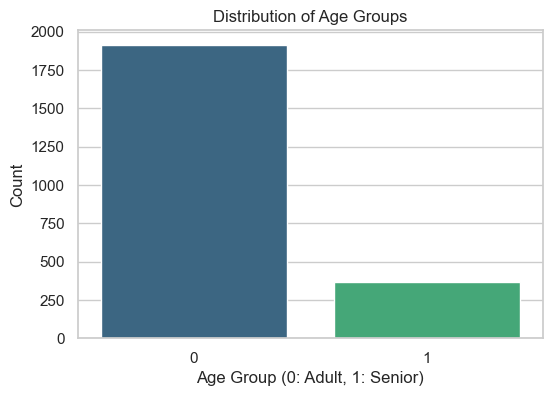

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', data=df, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group (0: Adult, 1: Senior)')
plt.ylabel('Count')
plt.show()


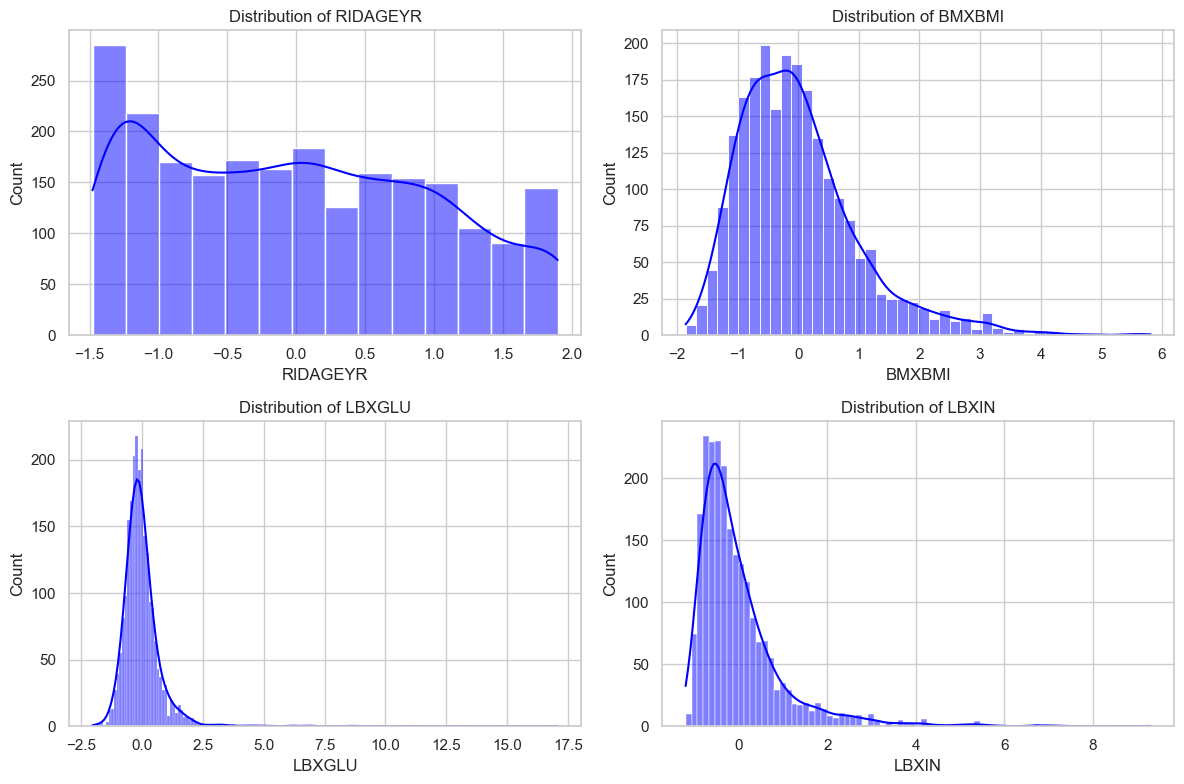

In [31]:
numerical_features = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXIN']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


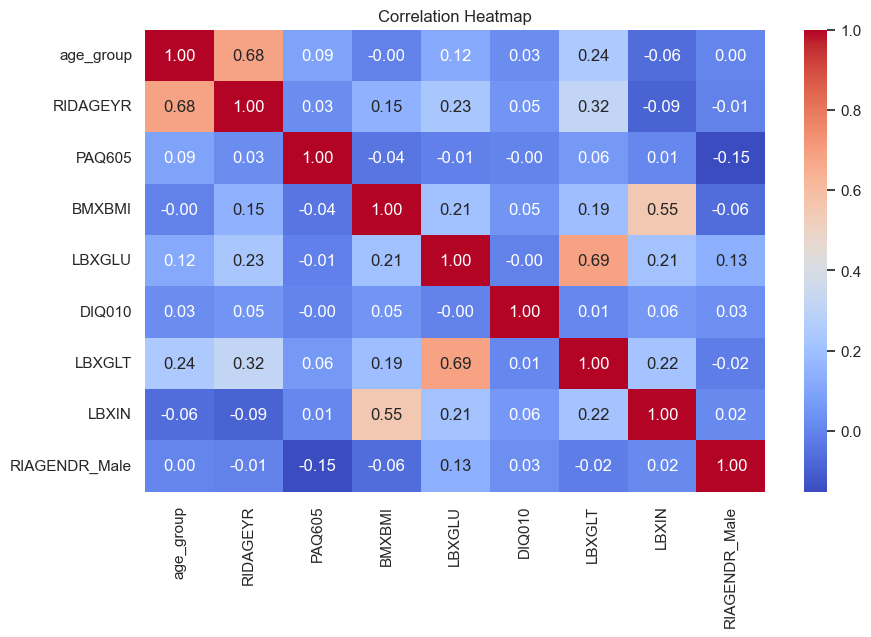

In [32]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


By:
Aditya Raj-129  
Diviyansh Giri-126  
Hithartha Dutta-112   